In [1]:
# imports
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import os
import random

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

%matplotlib inline

# Agenda

1- Understand why effective visualizations are important

2- Learn about the grammar of graphics and how to choose the right visual approach

3- Get a snapshot of the python visualization universe

Foundation - learn about matplotlib, understand core use cases & pitfalls + ways to make it better, do some live coding

Future - Learn about the bokeh library, understand advantages, learn about interactive visualizations, even more live coding


# 1- Understand why effective visualizations are important


# Why Visualizations?  -> A picture is worth a thousand words
- communicate information + story to <b> accomplish a goal</b>


- goal can be:
   - create understanding
   - convice someone to take action
   - [what makes a good visualization?  check out this information is beautiful graphic](https://informationisbeautiful.net/visualizations/what-makes-a-good-data-visualization/)


- Graphics provide super efficient compression of data


- People have powerful ability of visual perception - let's help them use it



# Understanding:  Napoleon's March to Moscow

<img src="./images/minard_google_maps.png" alt="Approximation of Napoleon Russian Campaign" title="European context of Napoleon Russian Campaign" />


# Charles Minard's Map of the March to Moscow

<img src="./images/minard.napoleon_russia_1812.png" alt="Charles Joseph Minards map of Napoleon Russian Campaign" title="The Best Statistical Graph ever drawn - Charles Joseph Minards map of Napoleon Russian Campaign" />

In [10]:
%%html
<style>
table {float:left}
</style>

##  What does this map say to you?

<table> <tr> <th style="width:600px"></th> <th></th> </tr> 
    <tr> 
        <td><img src="./images/minard.napoleon_russia_1812.png" alt="Charles Joseph Minards map of Napoleon Russian Campaign" title="The Best Statistical Graph ever drawn - Charles Joseph Minards map of Napoleon Russian Campaign" /></td>
        <td style="text-align:left"> <strong>- 422,000 vs 10,000<br><br> 
            - includes evidence/sources<br><br>
            - old temperature scale<br><br>
            - what are the main causes of losses?<br><br> </strong> </td> 
    </tr>
    <tr>
        <td></td>
        <td></td>
    </tr>
    <tr>
        <td></td>
        <td style="text-align:left"> 
            <a href="https://en.wikipedia.org/wiki/Charles_Joseph_Minard#The_map_of_Napoleon%27s_Russian_campaign"><strong>link: charles minard - wikipedia</strong></a></td>
    </tr>
        <tr>
            <td></td>
            <td style="text-align:left">
                <a href="https://www.chezvoila.com/blog/minard-map"><strong>link: information design analysis on this map</strong></a></td></tr>
</table>


## Anti-war map that stresses catestrophic human losses


## Effectively integrates six datatypes in two dimensions (in 1869!)

- number of Napoleon's troops
- the distance traveled
- temperature; 
- latitude and longitude
- direction of travel
- location relative to specific dates

## Take Action:  Challenger Disaster

<table> <tr> <th style="width:600px"></th> <th></th> </tr> 
    <tr> 
        <td><img src="./images/challenger.photo.1110px-Challenger_explosion.jpg" alt="Space Shuttle Challenger Disaster - 28 Jan 1986" title="Space Shuttle Challenger Disaster" /></td>
        <td style="text-align:left"> <strong>- All seven crew members died<br><br> 
            - five NASA astronauts, one payload specialist, and a civilian school teacher<br><br><br><br> 
            - caused by the failure of O-ring seals in right solid rocket booster<br><br>
            - O-ring seals were NOT designed for unusually cold conditions at launch<br><br> 
            - Flames got past O-ring seals and hit the liquid hydrogen fuel tank<br><br><br><br> 
            - Organizational culture and decision-making processes were key contributing factors to the accident<br><br>
            - NASA managers disregarded NO-LAUNCH warnings from engineers<br><br><br><br><br><br>  
            - <i>...but the warnings were confusing</i><br><br></strong> </td> 
    </tr>
    <tr>
        <td></td>
        <td></td>
    </tr>
    <tr>
        <td></td>
        <td style="text-align:left"> 
            <a href="https://en.wikipedia.org/wiki/Space_Shuttle_Challenger_disaster"><strong>link: challenger disaster - wikipedia</strong></a></td>
    </tr>
        <tr>
        <td></td>
        <td style="text-align:left"> 
            <a href="https://forum.nasaspaceflight.com/index.php?PHPSESSID=n2pbop2fh60010n76lmcnh4po7&action=dlattach;topic=8535.0;attach=25186"><strong>link: Rogers Commission Report</strong></a></td>
    </tr>
        <tr>
    </tr>
        <tr>
        <td></td>
        <td style="text-align:left"> 
            <a href="hhttps://en.wikipedia.org/wiki/Rogers_Commission_Report"><strong>link: tldr - wikipedia page on Rogers Commission Report</strong></a></td>
    </tr>
        <tr>
            <td></td>
            <td style="text-align:left">
                <a href="https://www.vice.com/en_us/article/kbb3qz/could-better-data-design-have-prevented-challenger"><strong>link: presentation obscured lack of data</strong></a></td></tr>
</table>

# why were the warnings confusing?


# [13 pages of data like this...](https://history.nasa.gov/rogersrep/v4part6.htm#1)

<table> 
    <tr> 
        <th></th> 
        <th></th> 
        <th></th> 
    </tr> 
    <tr> 
        <td><img src="./images/challenger_main_no_launch_chart_srm_field_joints.jpg" alt="Challenger - Engineer Warning -SRM Field Joints" title="No Launch - SRM Field Joints" /></td>
        <td><img src="./images/challenger_main_no_launch_chart.booster_damage.v5p896.jpg" alt="Challenger - Engineer Warning - History of O-Ring Damage" title="History of O-Ring Damages" /></td>
        <td><img src="./images/challenger_main_no_launch_oring_temp_vs_damage.jpg" alt="Challenger - Engineer Warning - O-Ring Damage vs Temp" title="O-Ring Damage vs Temp" /></td>
        <th></th> 
    </tr>
</table>


[original source](https://history.nasa.gov/rogersrep/v4part6.htm#1)

# these pages

## - Defined the framework for the launch/no-launch decision


## - Omitted 22 launches with temperature vs o-ring damage


## - Obscured a crucial lack of data


## - Were just not compelling


# There must be a better way


[Envisioning Information - Edward Tufte](https://www.edwardtufte.com/tufte/books_ei)



### Distills Challenger data from Roberts Report & Makes a compelling visualization


### Let's replicate that in pandas & matplotlib


In [15]:
import pandas as pd
df = pd.read_csv("./images/challenger_o-ring_damage_data.csv", encoding="ISO-8859–1")

display(df.head(10))

print("\n\n...then do some cleanup, which we'll skip\n")

,Flight,Date,Temperature °F,Erosion incidents,Blow-by incidents,Damage index,Comments
0,51-C,01.24.85,53,3.0,2.0,11,Most erosion any flight; blow-by; back-up ring...
1,41-B,02.03.84,57,1.0,NaN,4,"Deep, extensive erosion"
2,61-C,01.12.86,58,1.0,NaN,4,O-ring erosion on launch two weeks before Chal...
3,41-C,04.06.84,63,1.0,NaN,2,"O-rings showed signs of heating, but no damage."
4,1,04.12.81,66,NaN,NaN,0,NaN
5,6,04.04.83,67,NaN,NaN,0,NaN
6,51-A,11.08.84,67,NaN,NaN,0,NaN
7,51-D,04.12.85,67,NaN,NaN,0,NaN
8,5,11.11.82,68,NaN,NaN,0,NaN
9,3,03.22.82,69,NaN,NaN,0,NaN




...then do some cleanup, which we'll skip



In [16]:
df["Date"] =  pd.to_datetime(df["Date"].str.replace("."," "))
# df["Date"] =  pd.to_datetime(df["Date"], format='%d.%m.%y')

df[["Erosion incidents", "Blow-by incidents"]] = df[["Erosion incidents", "Blow-by incidents"]].fillna(axis=1, value=0)
df[["Temperature °F", "Erosion incidents", "Blow-by incidents", "Damage index"]] = df[["Temperature °F", "Erosion incidents", "Blow-by incidents", "Damage index"]].apply(pd.to_numeric).astype('int')

df[["Flight", "Comments"]] = df[["Flight", "Comments"]].astype('category')
df["Comments"] = df["Comments"].cat.add_categories("no comment listed")
df[["Comments"]] = df[["Comments"]].fillna("no comment listed")

df

,Flight,Date,Temperature °F,Erosion incidents,Blow-by incidents,Damage index,Comments
0,51-C,1985-01-24,53,3,2,11,Most erosion any flight; blow-by; back-up ring...
1,41-B,1984-02-03,57,1,0,4,"Deep, extensive erosion"
2,61-C,1986-01-12,58,1,0,4,O-ring erosion on launch two weeks before Chal...
3,41-C,1984-04-06,63,1,0,2,"O-rings showed signs of heating, but no damage."
4,1,1981-04-12,66,0,0,0,no comment listed
5,6,1983-04-04,67,0,0,0,no comment listed
6,51-A,1984-11-08,67,0,0,0,no comment listed
7,51-D,1985-04-12,67,0,0,0,no comment listed
8,5,1982-11-11,68,0,0,0,no comment listed
9,3,1982-03-22,69,0,0,0,no comment listed


In [17]:
# sort temperature values to use as X axis, so we can plot results
df = df.sort_values("Temperature °F")
df.head(10)

,Flight,Date,Temperature °F,Erosion incidents,Blow-by incidents,Damage index,Comments
0,51-C,1985-01-24,53,3,2,11,Most erosion any flight; blow-by; back-up ring...
1,41-B,1984-02-03,57,1,0,4,"Deep, extensive erosion"
2,61-C,1986-01-12,58,1,0,4,O-ring erosion on launch two weeks before Chal...
3,41-C,1984-04-06,63,1,0,2,"O-rings showed signs of heating, but no damage."
4,1,1981-04-12,66,0,0,0,no comment listed
5,6,1983-04-04,67,0,0,0,no comment listed
6,51-A,1984-11-08,67,0,0,0,no comment listed
7,51-D,1985-04-12,67,0,0,0,no comment listed
8,5,1982-11-11,68,0,0,0,no comment listed
9,3,1982-03-22,69,0,0,0,no comment listed


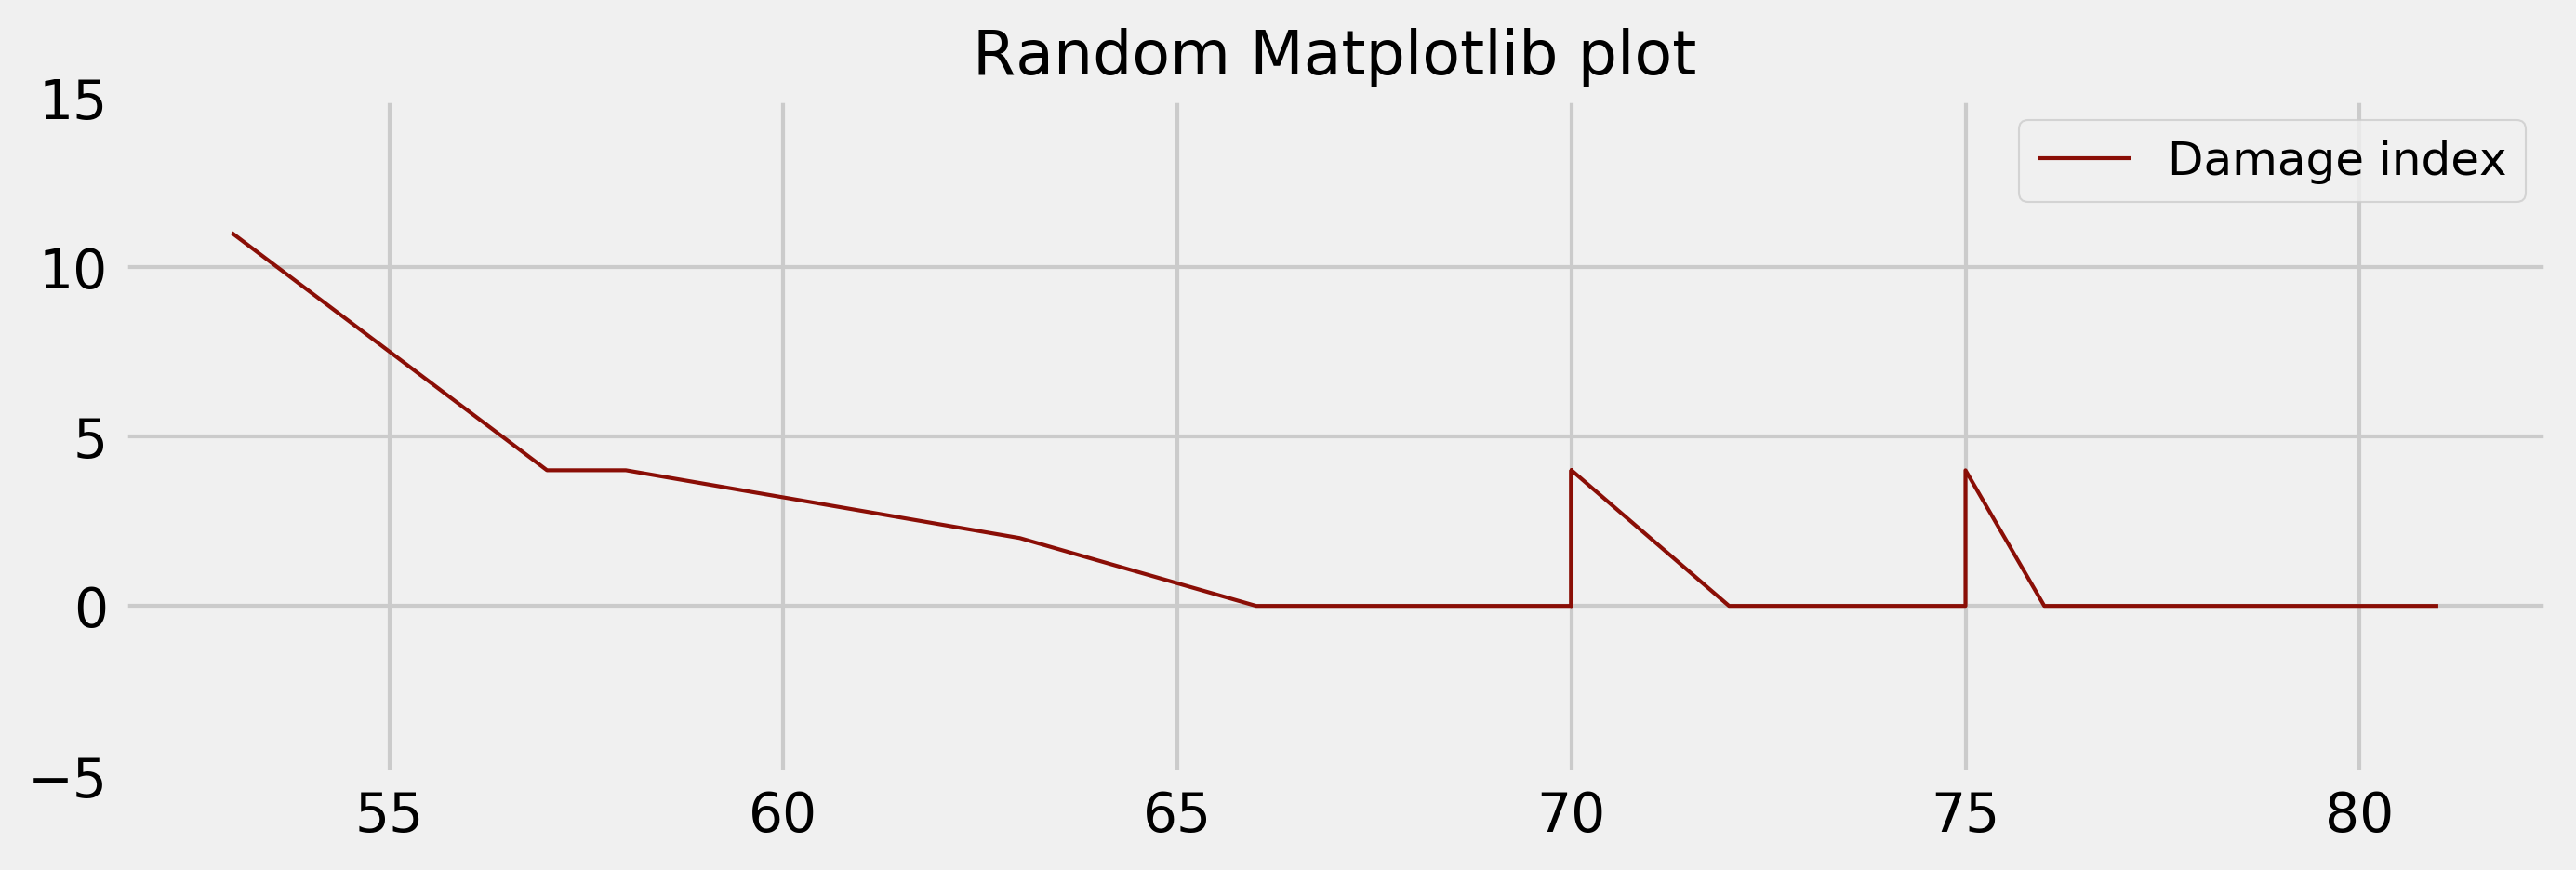

In [18]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(10,3), dpi=300)
plt.style.use('fivethirtyeight')
plt.ylim(-5, 15)
plt.plot(df["Temperature °F"], df["Damage index"], linestyle="-", linewidth=1, color="#8a0e06", label="Damage index");
# plt.plot(df["Temperature °F"], df["Erosion incidents"], linestyle="dotted", linewidth=1, color="#1c478c", label="Erosion incidents");
plt.title("Random Matplotlib plot", fontsize=16);
plt.legend(loc="best", fontsize=12);


In [20]:
model = LinearRegression()

In [43]:
# add linear regression
X = df.loc[:, "Temperature °F"].values.reshape(-1, 1) # get values & convert to a numpy array
Y = df.loc[:, "Damage index"].values.reshape(-1, 1)  # get values and convert into 1 column numpy array
# X = df.iloc[:, 2].values.reshape(-1, 1)  # another way to do this using iloc
# Y = df.iloc[:, 5].values.reshape(-1, 1)  # ibid

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

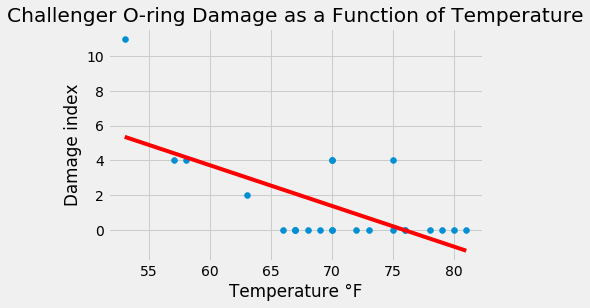

In [47]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.title("Challenger O-ring Damage as a Function of Temperature")
plt.xlabel("Temperature °F")
plt.ylabel("Damage index")
plt.show()

In [70]:
Z = [x for x in range(20, 55)]
Z = np.asarray(Z).reshape(-1, 1)
Z_pred = linear_regressor.predict(Z)  # make predictions

In [88]:
challenger_launch_temp = 36
challenger_launch_temp_np = np.asarray(challenger_launch_temp).reshape(-1, 1)
predicted_damage_index_at_challenger_launch_temp = linear_regressor.predict(challenger_launch_temp_np)
print(predicted_damage_index_at_challenger_launch_temp)

[[9.33666667]]


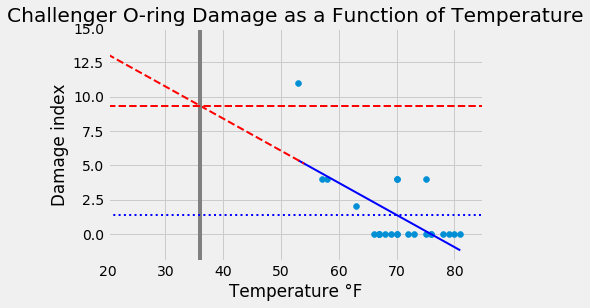

In [89]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='blue', linewidth=2)
plt.plot(Z, Z_pred, color='red', linestyle="--", linewidth=2)
plt.axvline(36, color="grey")
plt.axhline(df.loc[:, "Damage index"].mean(), color="blue", linestyle="dotted", linewidth=2)
plt.axhline(predicted_damage_index_at_challenger_launch_temp, color="red", linestyle="--", linewidth=2)
plt.xlim(20, 85)
plt.ylim(-2, 15)
plt.title("Challenger O-ring Damage as a Function of Temperature")
plt.xlabel("Temperature °F")
plt.ylabel("Damage index")
plt.show()

In [44]:
linear_regressor.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

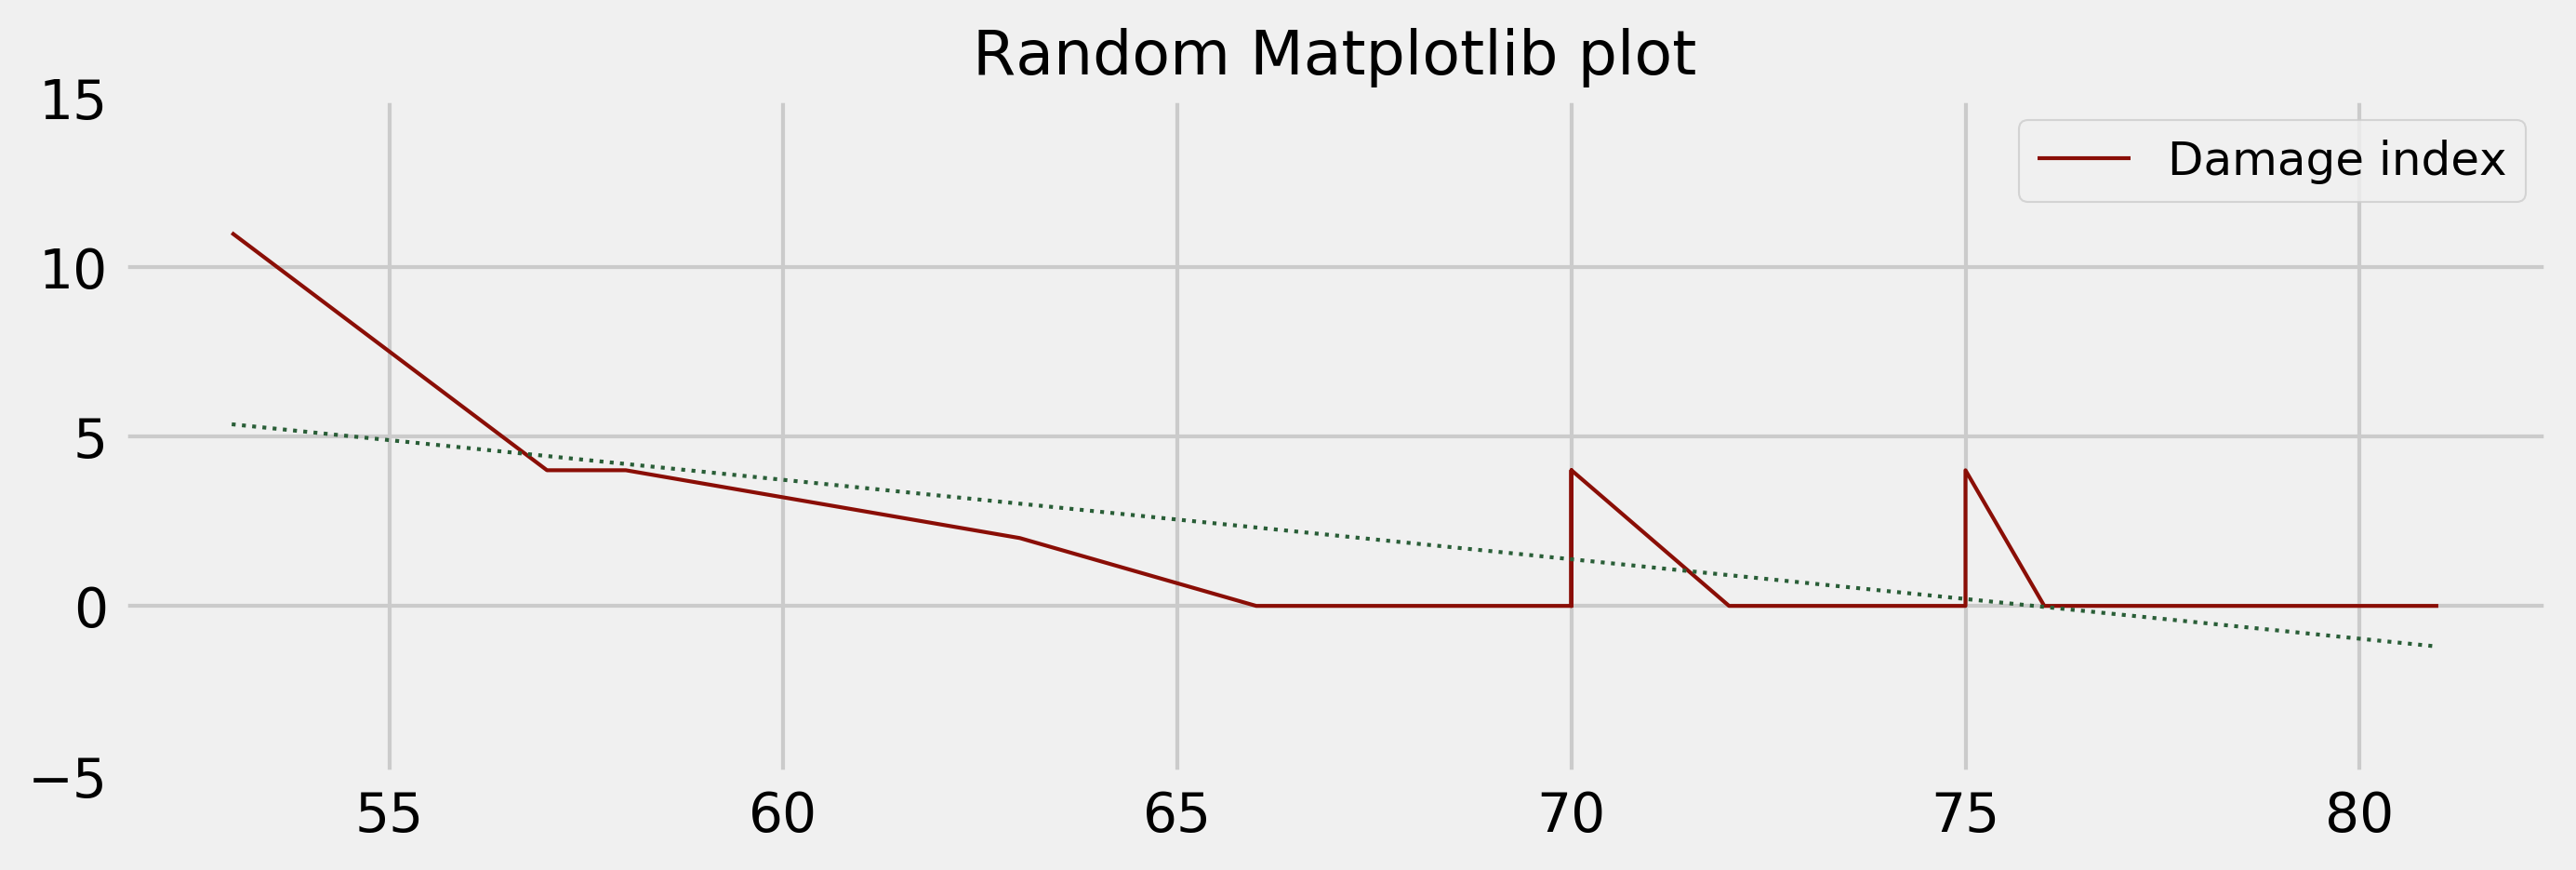

In [46]:
Y_pred = linear_regressor.predict(X)
plt.figure(figsize=(10,3), dpi=300)
plt.style.use('fivethirtyeight')
plt.ylim(-5, 15)
plt.plot(df["Temperature °F"], df["Damage index"], linestyle="-", linewidth=1, color="#8a0e06", label="Damage index");
# plt.plot(df["Temperature °F"], df["Erosion incidents"], linestyle="dotted", linewidth=1, color="#1c478c", label="Erosion incidents");
plt.title("Random Matplotlib plot", fontsize=16);
plt.legend(loc="best", fontsize=12);
plt.plot(X, Y_pred, linestyle="dotted", linewidth=1, color="#295e37", label="linear regression");

# 2- Learn about the grammar of graphics and how to choose the right visual approach

# 3- Get a snapshot of the python visualization universe